In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Particle Size Distribution

In [4]:
data = pd.read_excel("files/Particle Size.xlsx")
data.head()

,size,T(80),T(120),T(160)
0,0.400,0.0,0.0,0.0
1,0.463,0.0,0.0,0.0
2,0.536,0.0,0.0,0.0
3,0.621,0.0,0.0,0.0
4,0.719,0.0,0.0,0.0


In [3]:
#Data for the Graph
x = data["size"]
T80 = data["T(80)"]
T120 = data["T(120)"]
T160 = data["T(160)"]

Text(0, 0.5, 'Intensity (a.u.)')

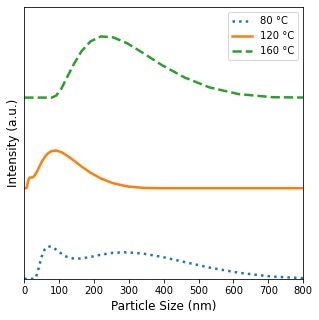

In [4]:
#Plotting the data
fig = plt.figure(1,figsize=(5,5))
plt.plot(x,T80,label="80 °C",ls=":",lw=2.5)
plt.plot(x,T120+20, label="120 °C",ls="-",lw=2.5)
plt.plot(x,T160+40, label="160 °C",ls="--",lw=2.5)
#limits, ticks and label on the axes. If we pass empty list to ticks the it will hide values and ticks
plt.xlim(0,800)
plt.ylim(0,60)
plt.yticks([])
plt.legend()
plt.xlabel("Particle Size (nm)",fontsize=12)
plt.ylabel("Intensity (a.u.)",fontsize=12)
#for saving figure in high quality
#plt.savefig('particle size.png', format='png', dpi=1200) 

## Cyclic Voltametry Plots at Various Scan Rates

In [5]:
#Loading Data From Excel Sheet
CV_data = pd.read_excel("files/cv scan rate.xlsx")
CV_data.head()

,Voltage,20 mV,40 mV,60 mV,80 mV,100 mV
0,-1.4999,-0.000832,-0.001102,-0.001076,-0.001063,-0.001055
1,-1.4940,-0.000793,-0.001061,-0.001034,-0.001020,-0.001012
2,-1.4880,-0.000758,-0.001023,-0.000996,-0.000979,-0.000970
3,-1.4821,-0.000727,-0.000988,-0.000960,-0.000940,-0.000931
4,-1.4761,-0.000698,-0.000954,-0.000926,-0.000903,-0.000892


In [6]:
#Storing data into different lists or arrays
Voltage = CV_data["Voltage"]
sr20mv = CV_data["20 mV"]
sr40mv = CV_data["40 mV"]
sr60mv = CV_data["60 mV"]
sr80mv = CV_data["80 mV"]
sr100mv = CV_data["100 mV"]

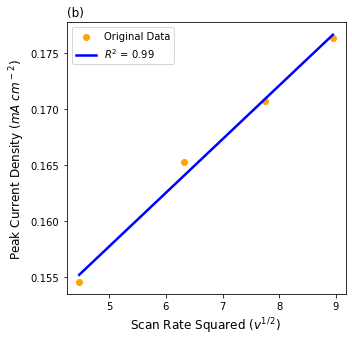

In [7]:
#Sqrt of scan rate vs current density
Ip = [max(sr20mv),max(sr40mv),max(sr60mv),max(sr80mv)]
Ip = np.array(Ip)
Ip = Ip*1000
sr = [20,40,60,80]
sr =np.array(sr)
sqrt_sr = np.sqrt(sr)
x = list(sqrt_sr)
y = list(Ip)

#Finding slope (m), intercept(b), r value, p-value, and std_err of the above data using linear_regression method
m, b, r, p, std_err = stats.linregress(x,y)

# Definig a function that returns f(x) after solving above equation.
def myfunc(x):
    return m*x+b

#storing f(x) values in a new variable as list.
mymodel = list(map(myfunc, x))

#Visualization of the above data.
fig = plt.figure(2,figsize=(5,5))
plt.scatter(sqrt_sr,Ip, c='orange', label='Original Data'); #scatter plot of original data
plt.plot(sqrt_sr,mymodel,c='blue',lw=2.5, label="$R^2$ = 0.99"); #Line plot of the fitted model
plt.legend()
plt.xlabel("Scan Rate Squared ($v^1$$^/$$^2$)", fontsize=12)
plt.ylabel("Peak Current Density ($mA$ $cm^-$$^2$)",fontsize=12)
plt.title("(b)",loc="left")
plt.savefig("Fittled line.png",format="png",dpi=1200,bbox_inches='tight')

In [45]:
print(r**2,m,b)

0.9925133381910829 0.004792257054611804 0.13375889159593274


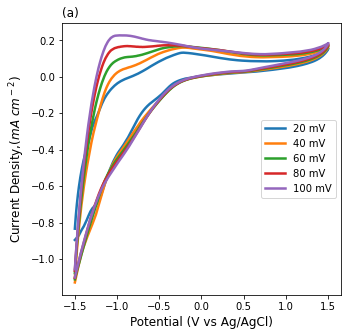

In [37]:
#Plotting the data
fig = plt.figure(3,figsize=(5,5))
plt.plot(Voltage,sr20mv*1000,label="20 mV",lw=2.5)
plt.plot(Voltage,sr40mv*1000,label="40 mV",lw=2.5)
plt.plot(Voltage,sr60mv*1000,label="60 mV",lw=2.5)
plt.plot(Voltage,sr80mv*1000,label="80 mV",lw=2.5)
plt.plot(Voltage,sr100mv*1000,label="100 mV",lw=2.5)
plt.legend(loc="center right")
plt.title("(a)",loc="left")
plt.xlabel("Potential (V vs Ag/AgCl)",fontsize=12)
plt.ylabel("Current Density,($mA$ $cm^-$$^2$)",fontsize=12)
plt.savefig("CV Curves as function of scan rates.png", format='png', dpi=1200,bbox_inches="tight")

## Subplots or Multipanel Plots

Text(367.36363636363626, 0.5, 'Peak Current Density ($mA$ $cm^-$$^2$)')

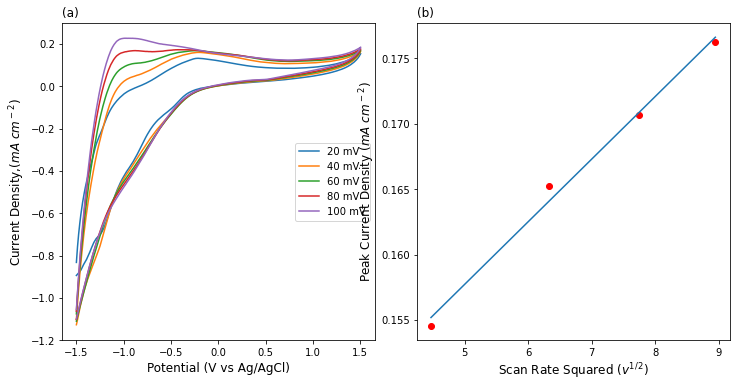

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.tight_layout()
fig.subplots_adjust(hspace=5)
#Plotting at index [0], that is first plot 

ax[0].plot(Voltage,sr20mv*1000,label="20 mV")
ax[0].plot(Voltage,sr40mv*1000,label="40 mV")
ax[0].plot(Voltage,sr60mv*1000,label="60 mV")
ax[0].plot(Voltage,sr80mv*1000,label="80 mV")
ax[0].plot(Voltage,sr100mv*1000,label="100 mV")
ax[0].legend(loc="center right")
ax[0].set_ylim(-1.2,0.3)
ax[0].set_xlabel("Potential (V vs Ag/AgCl)", fontsize=12)
ax[0].set_ylabel("Current Density,($mA$ $cm^-$$^2$)", fontsize=12)
ax[0].set_title("(a)", loc="left",fontsize=12)

#Plotting at index [1], that is 2nd Plot
ax[1].scatter(sqrt_sr,Ip, c='r')
ax[1].plot(sqrt_sr,mymodel)
ax[1].set_title("(b)", loc="left", fontsize=12)
ax[1].set_xlabel("Scan Rate Squared ($v^1$$^/$$^2$)", fontsize=12)
ax[1].set_ylabel("Peak Current Density ($mA$ $cm^-$$^2$)", fontsize=12)

#fig.savefig("CV Curves.png", format="png", dpi=1200)

## CV Data at Different Temperatures

In [10]:
cvt = pd.read_excel("files/CV at diff T.xlsx")
cvt.head()

,Voltage,80C,120C,160C
0,-1.4999,-0.001062,-0.001000,-0.000803
1,-1.4940,-0.000995,-0.000935,-0.000738
2,-1.4880,-0.000936,-0.000880,-0.000687
3,-1.4821,-0.000883,-0.000831,-0.000644
4,-1.4761,-0.000835,-0.000788,-0.000607


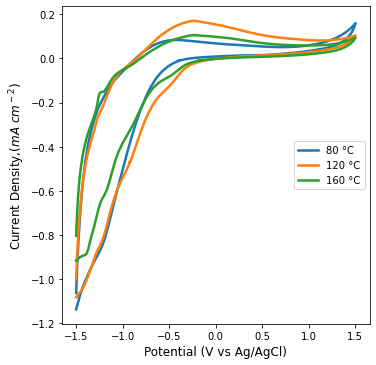

In [36]:
fig, ax=plt.subplots(figsize=(5,5),facecolor="White")
fig.tight_layout()
ax.plot(cvt["Voltage"],cvt["80C"]*1000,label="80 °C",lw=2.5)
ax.plot(cvt["Voltage"],cvt["120C"]*1000,label="120 °C",lw=2.5)
ax.plot(cvt["Voltage"],cvt["160C"]*1000,label="160 °C",lw=2.5)
ax.legend(loc="center right")
ax.set_xlabel("Potential (V vs Ag/AgCl)", fontsize=12)
ax.set_ylabel("Current Density,($mA$ $cm^-$$^2$)", fontsize=12)
fig.savefig("CV as f of T.png",dpi=1200,bbox_inches="tight")